## **Multivariat Regression Analysis**

# Pre-Processing

In [ ]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1_LrDngSZ2aQkLPERS_catXrr0Zt-7Tsp/view?usp=sharing'

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('energy_dataset.csv')

df = pd.read_csv('energy_dataset.csv')

In [ ]:
df['time'] = pd.to_datetime(df['time'], utc=True, infer_datetime_format=True)
df = df.set_index('time')

<ipython-input-25-ec10a8182335>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['time'] = pd.to_datetime(df['time'], utc=True, infer_datetime_format=True)


In [ ]:
df.drop(['generation fossil coal-derived gas', 'generation fossil oil shale','generation fossil peat', 'generation geothermal','generation marine','generation wind offshore','forecast solar day ahead', 'forecast wind offshore eday ahead', 'forecast wind onshore day ahead','total load forecast','price day ahead', 'generation hydro pumped storage aggregated'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35045 non-null  float64
 1   generation fossil brown coal/lignite         35046 non-null  float64
 2   generation fossil gas                        35046 non-null  float64
 3   generation fossil hard coal                  35046 non-null  float64
 4   generation fossil oil                        35045 non-null  float64
 5   generation hydro pumped storage consumption  35045 non-null  float64
 6   generation hydro run-of-river and poundage   35045 non-null  float64
 7   generation hydro water reservoir             35046 non-null  float64
 8   generation nuclear                           35047 non-null  float64
 9   generation other         

In [ ]:
df.drop_duplicates()
df.isnull().sum()

generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
total load actual                              36
price actual                                    0
dtype: int64

In [ ]:
df = df.dropna(axis=0, how='any')

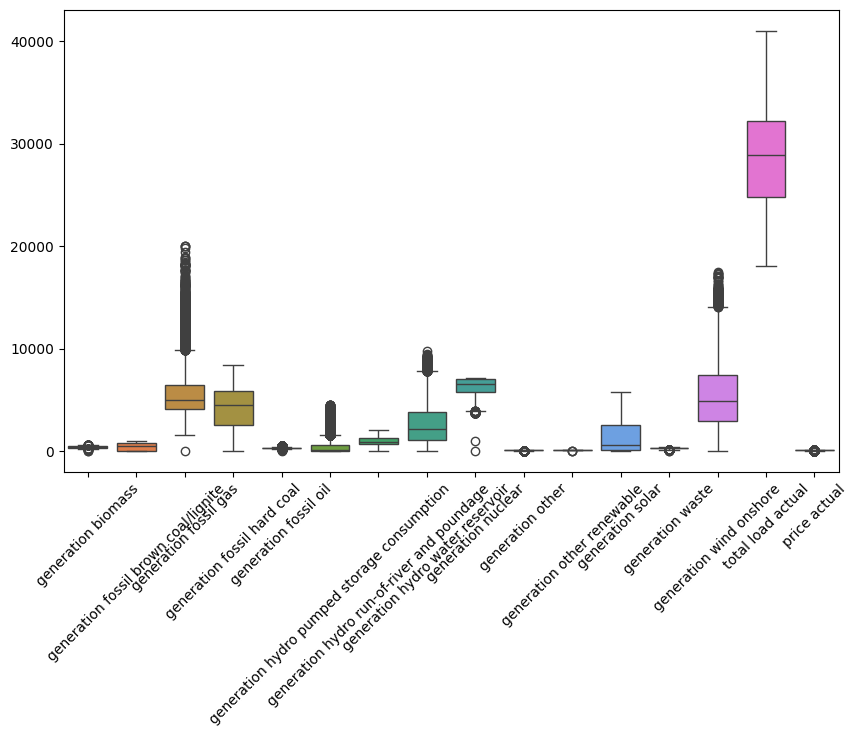

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = df)
plt.xticks(rotation = 45)
plt.show()

# EDA

In [ ]:
df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual
count,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000
mean,383.528614,448.115940,5622.496373,4255.618625,298.333114,475.712833,972.081787,2604.490862,6264.021817,60.237107,85.651436,1433.054201,269.502142,5466.056742,28696.833457,57.887268
std,85.303560,354.608322,2202.043540,1961.420351,52.469975,792.546192,400.751496,1834.938030,838.274351,20.236076,14.063817,1680.323255,50.143242,3213.580919,4574.173105,14.190082
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18041.000000,9.330000
25%,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1077.000000,5760.000000,53.000000,74.000000,71.000000,240.000000,2935.000000,24808.000000,49.360000
50%,367.000000,509.000000,4968.000000,4473.000000,300.000000,68.000000,906.000000,2164.000000,6564.000000,57.000000,88.000000,616.000000,279.000000,4850.000000,28901.500000,58.020000
75%,433.000000,757.000000,6428.750000,5837.000000,330.000000,616.000000,1250.000000,3755.000000,7024.000000,80.000000,97.000000,2578.750000,310.000000,7399.000000,32192.000000,68.000000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,41015.000000,116.800000


In [ ]:
df

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual
time,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,30653.0,77.02
2018-12-31 19:00:00+00:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,29735.0,76.16
2018-12-31 20:00:00+00:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,28071.0,74.30


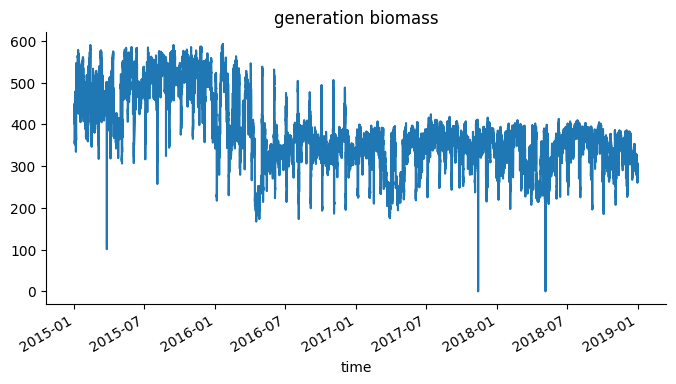

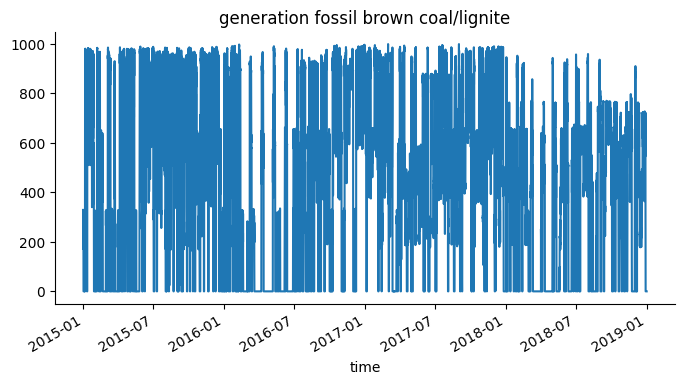

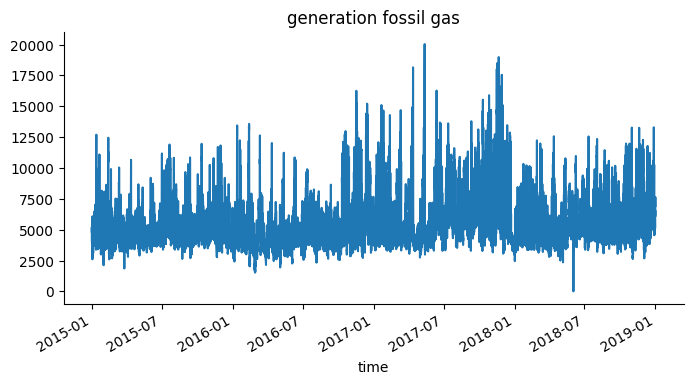

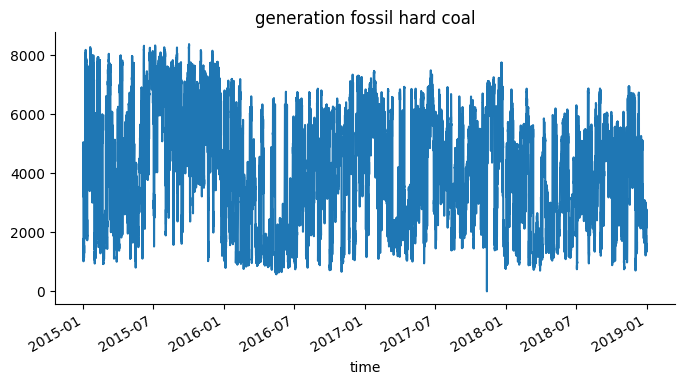

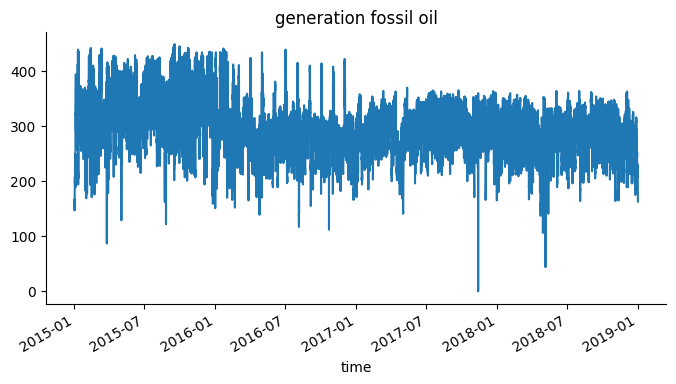

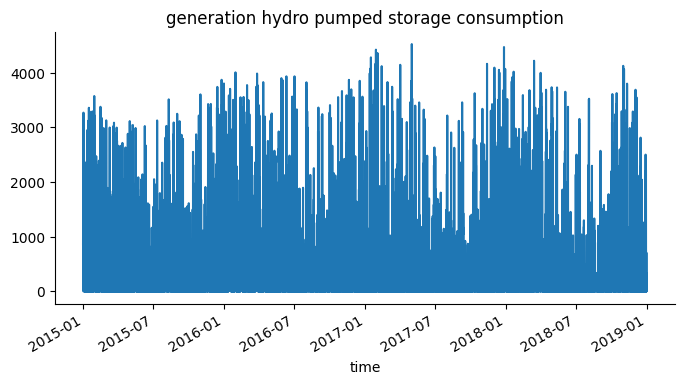

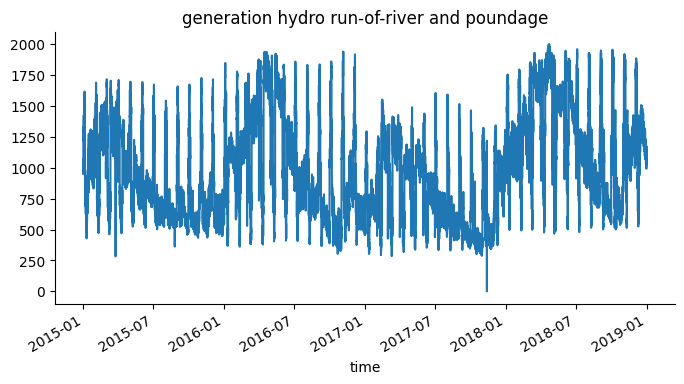

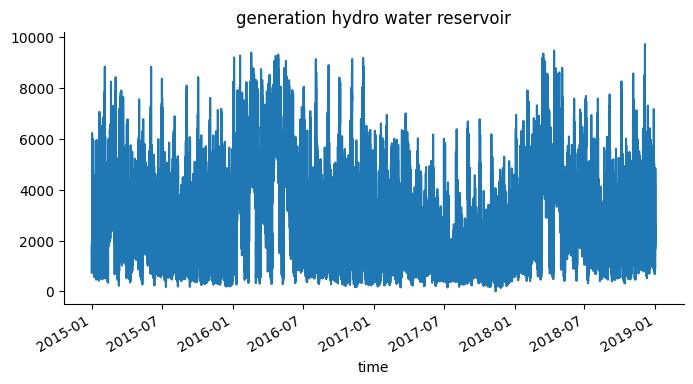

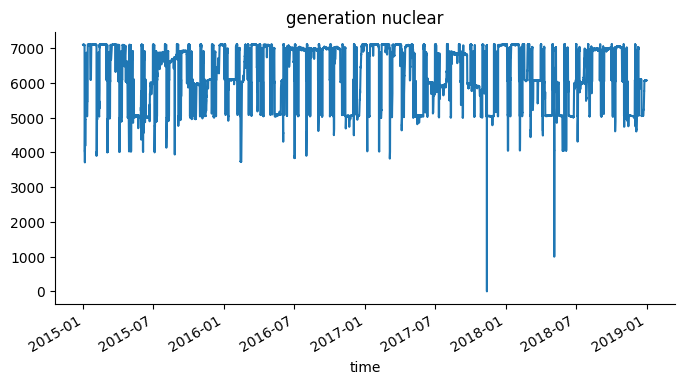

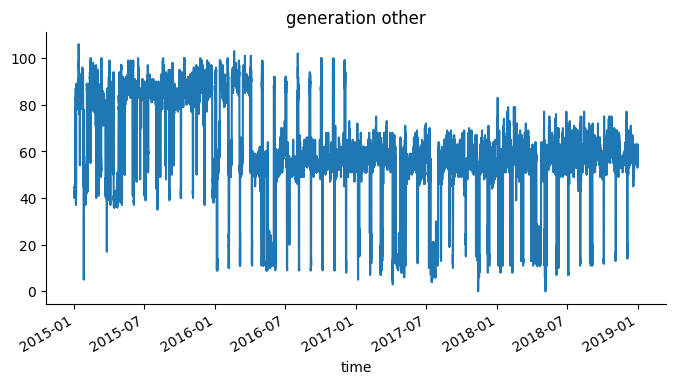

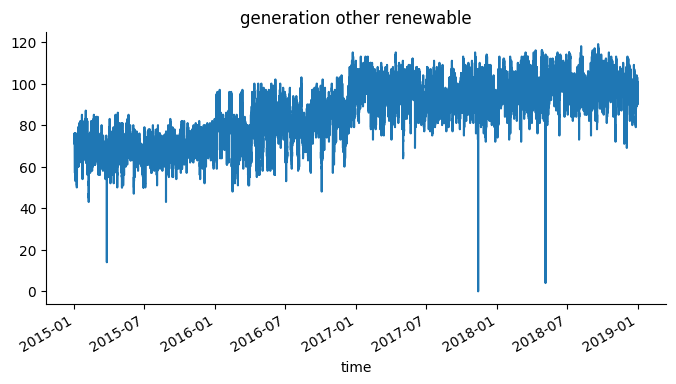

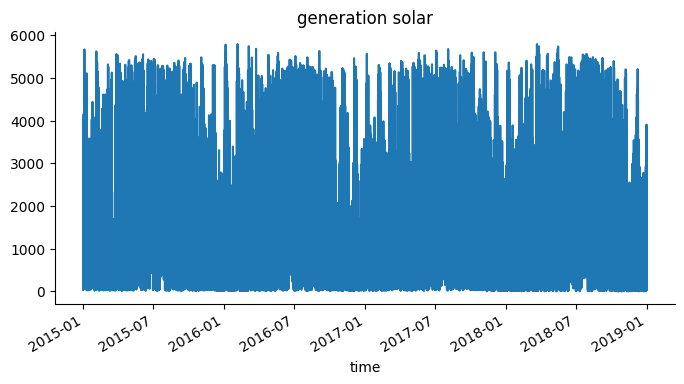

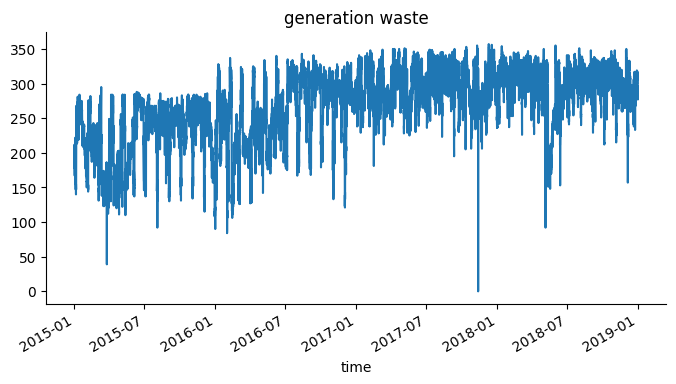

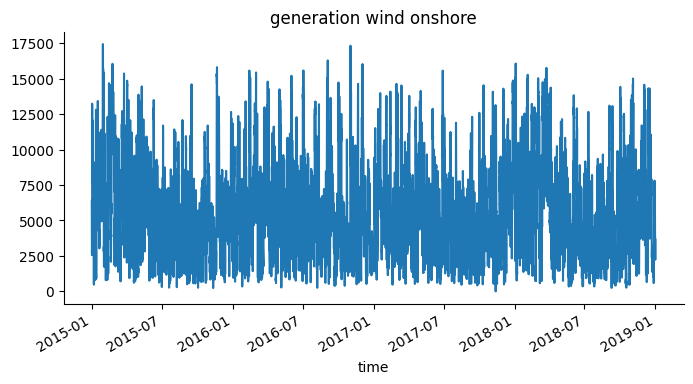

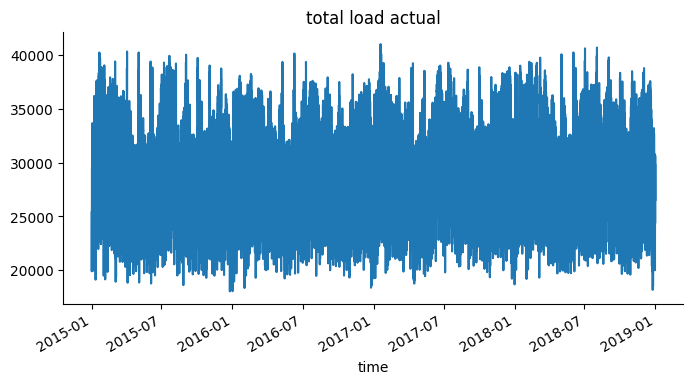

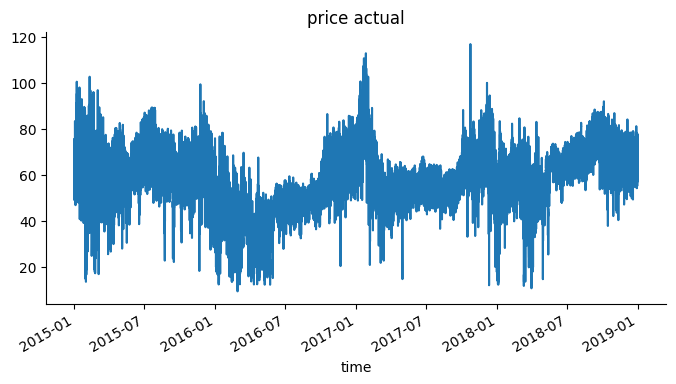

In [ ]:
columns = df.columns.to_list()
columns
for i in columns:
    df[i].plot(kind='line', figsize=(8, 4), title = i)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()

# Rescalling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
num_vars = ['generation biomass','generation fossil brown coal/lignite','generation fossil gas','generation fossil hard coal','generation fossil oil','generation hydro pumped storage consumption','generation hydro run-of-river and poundage','generation hydro water reservoir','generation nuclear','generation other','generation other renewable','generation solar','generation waste','generation wind onshore']
df[num_vars] = scaler.fit_transform(df[num_vars])
df = sm.add_constant(df, has_constant='add')

# Univariate Multiple Regression

In [ ]:
y1 = df.pop('total load actual')
y2 = df.pop('price actual')
X = df

In [ ]:
#LINEAR REGRESSION

from sklearn.linear_model import LinearRegression

#Create a linear regression
lr = LinearRegression()

In [ ]:
lr.fit(X, y1)

LinearRegression()

In [ ]:
lr_y1 = sm.OLS(y1, X).fit()
print(lr_y1.summary())

                            OLS Regression Results                            
Dep. Variable:      total load actual   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 1.561e+04
Date:                Thu, 06 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:31:42   Log-Likelihood:            -1.5009e+05
No. Observations:               17574   AIC:                         3.002e+05
Df Residuals:                   17559   BIC:                         3.003e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [ ]:
lr_y2 = sm.OLS(y2, X).fit()
print(lr_y2.summary())

                            OLS Regression Results                            
Dep. Variable:           price actual   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     1125.
Date:                Thu, 06 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:32:22   Log-Likelihood:                -66880.
No. Observations:               17574   AIC:                         1.338e+05
Df Residuals:                   17559   BIC:                         1.339e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [ ]:
X = X.drop(["generation fossil oil",'generation nuclear'], axis = 1)

In [ ]:
lr_y1 = sm.OLS(y1, X).fit()
print(lr_y1.summary())

                            OLS Regression Results                            
Dep. Variable:      total load actual   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 1.443e+04
Date:                Thu, 06 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:33:12   Log-Likelihood:            -1.5197e+05
No. Observations:               17574   AIC:                         3.040e+05
Df Residuals:                   17561   BIC:                         3.041e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [ ]:
lr_y2 = sm.OLS(y2, X).fit()
print(lr_y2.summary())

                            OLS Regression Results                            
Dep. Variable:           price actual   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     1313.
Date:                Thu, 06 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:33:23   Log-Likelihood:                -66881.
No. Observations:               17574   AIC:                         1.338e+05
Df Residuals:                   17561   BIC:                         1.339e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [ ]:
X = X.drop(['generation fossil brown coal/lignite'], axis = 1)

In [ ]:
lr_y1 = sm.OLS(y1, X).fit()
print(lr_y1.summary())

                            OLS Regression Results                            
Dep. Variable:      total load actual   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 1.574e+04
Date:                Thu, 06 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:34:05   Log-Likelihood:            -1.5197e+05
No. Observations:               17574   AIC:                         3.040e+05
Df Residuals:                   17562   BIC:                         3.041e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [ ]:
lr_y2 = sm.OLS(y2, X).fit()
print(lr_y2.summary())

                            OLS Regression Results                            
Dep. Variable:           price actual   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     1430.
Date:                Thu, 06 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:34:08   Log-Likelihood:                -66886.
No. Observations:               17574   AIC:                         1.338e+05
Df Residuals:                   17562   BIC:                         1.339e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

# Residual Analysis

In [ ]:
y1_pred = lr_y1.predict(X)

<ipython-input-25-70181f9f8470>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((res), bins = 20)


Text(0.5, 0, 'Errors')

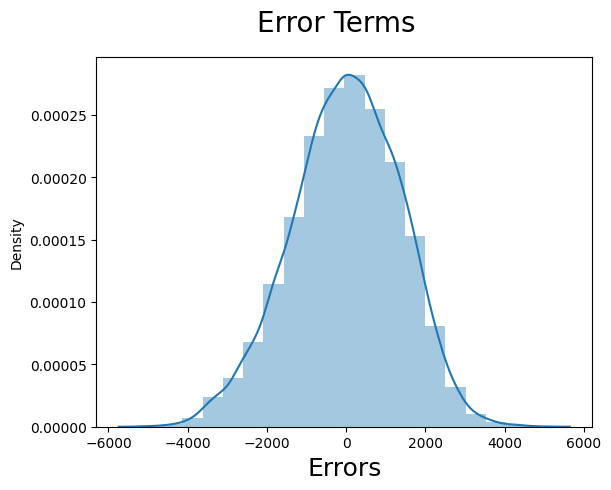

In [ ]:
res = lr_y1.resid

fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

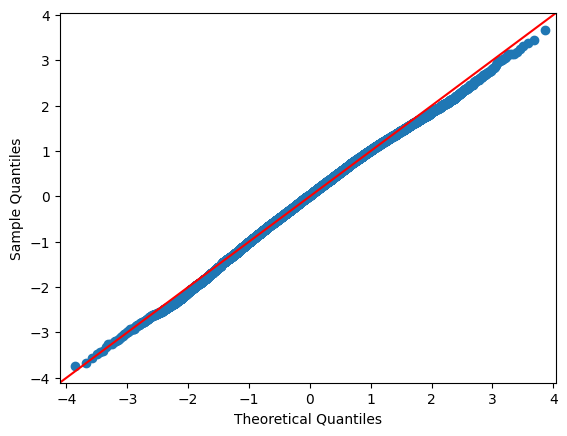

In [ ]:
# qqplot ; normality analysis of residual
fig = sm.qqplot(res, fit=True, line='45')

Text(0, 0.5, 'Residual')

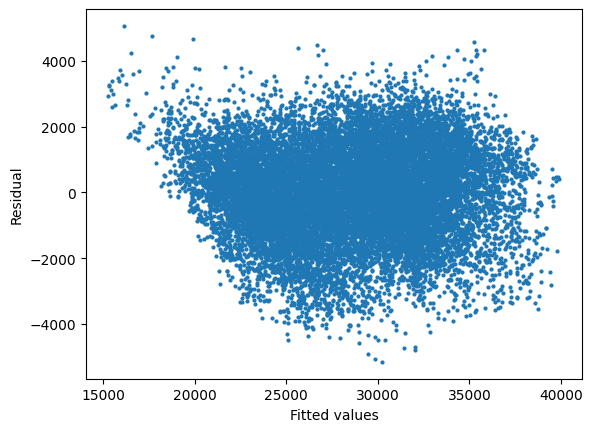

In [ ]:
fig = plt.scatter(y1_pred, res, s=4)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

<ipython-input-28-04dbacf23aca>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((res), bins = 20)


Text(0.5, 0, 'Errors')

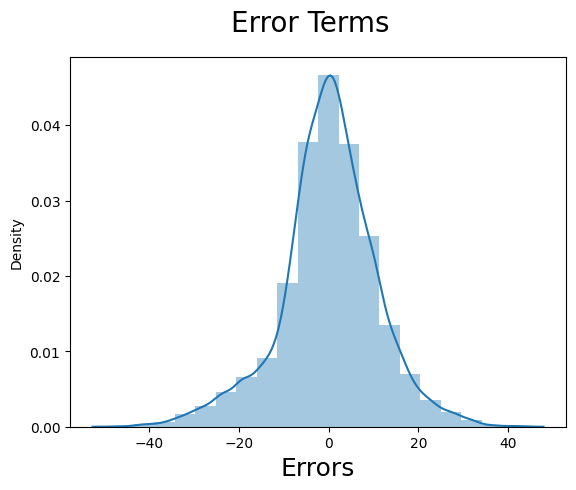

In [ ]:
res = lr_y2.resid

fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

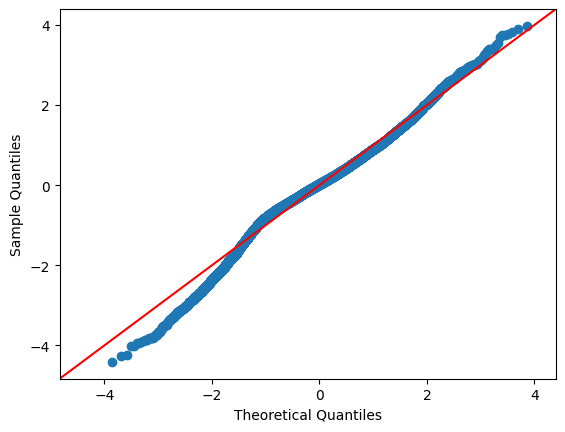

In [ ]:
# qqplot ; normality analysis of residual
fig = sm.qqplot(res, fit=True, line='45')

# Multivariate Multiple Regression

In [ ]:
from statsmodels.multivariate.manova import MANOVA

y = pd.concat([y1, y2], axis=1)
y.columns = ['total load actual', 'price actual']
manova = MANOVA(endog=y, exog=X)
result = manova.mv_test()
print(result.summary())

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
            x0           Value  Num DF   Den DF    F Value  Pr > F
------------------------------------------------------------------
           Wilks' lambda 0.7751 2.0000 17561.0000 2547.4949 0.0000
          Pillai's trace 0.2249 2.0000 17561.0000 2547.4949 0.0000
  Hotelling-Lawley trace 0.2901 2.0000 17561.0000 2547.4949 0.0000
     Roy's greatest root 0.2901 2.0000 17561.0000 2547.4949 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
             x1           Value  Num DF   Den DF   F Value  Pr > F
------------------------------------------------------------------
            Wilks' lambda 0.9812 2.0000 17561.0000 168.6127 0.0000
           Pilla

# Multivariate Normality test

In [ ]:
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
from scipy.stats import shapiro, norm
from scipy.stats import boxcox, yeojohnson
from sklearn.preprocessing import PowerTransformer

# Gabungkan data untuk analisis multivariat
df_model = df.drop(['generation nuclear', 'generation fossil oil', 'generation fossil brown coal/lignite'], axis=1)
data = df_model

# Fungsi untuk Uji Mardia
def mardia_test(data):
    n, p = data.shape
    S = np.cov(data, rowvar=False)
    inv_S = np.linalg.inv(S + np.eye(p) * 1e-8)
    X = data - np.mean(data, axis=0)
    D = np.dot(X, np.dot(inv_S, X.T)).diagonal()

    # Mardia's skewness
    skewness = np.sum(D**3) / n**2
    skew_pval = 1 - norm.cdf(skewness)

    # Mardia's kurtosis
    kurtosis_val = np.sum(D**2) / n
    kurt_pval = 1 - norm.cdf(kurtosis_val)

    return skewness, skew_pval, kurtosis_val, kurt_pval

# Run Mardia's test
skewness, skew_pval, kurtosis_val, kurt_pval = mardia_test(df_model.values)
print("Mardia's Skewness:", skewness, "p-value:", skew_pval)
print("Mardia's Kurtosis:", kurtosis_val, "p-value:", kurt_pval)

Mardia's Skewness: 0.1685896688778946 p-value: 0.43305970364124113
Mardia's Kurtosis: 152.55273850714602 p-value: 0.0
